Support Vector Machines:

In [9]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn import preprocessing
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv("cell_samples.csv")
dataset.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Graficar datos:

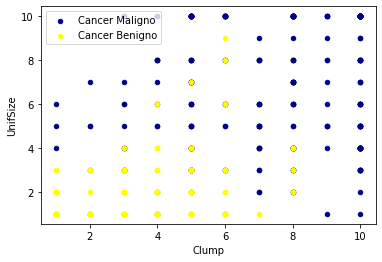

In [12]:
ax = dataset[dataset['Class'] == 4].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize',
                                         color = 'DarkBlue', label='Cancer Maligno')
dataset[dataset['Class'] == 2].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'Yellow',
                                   label = 'Cancer Benigno', ax = ax)
plt.show()

Preprocesamiento de Datos:

In [16]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [21]:
dataset = dataset[pd.to_numeric(dataset['BareNuc'], errors='coerce').notnull()]
dataset['BareNuc'] = dataset['BareNuc'].astype('int')
dataset.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [23]:
X = dataset[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [26]:
y = dataset['Class'].values
y[0:5]

array([2, 2, 2, 2, 2])

Separacion train/test

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 4)
print("X-y train: ", Xtrain.shape, ", ", ytrain.shape)
print("X-y test: ", Xtest.shape, ", ", ytest.shape)

X-y train:  (546, 9) ,  (546,)
X-y test:  (137, 9) ,  (137,)


Modelar:

In [30]:
from sklearn import svm
modelo = svm.SVC(kernel = 'rbf')
modelo.fit(Xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Prediccion:

In [32]:
ygorro = modelo.predict(Xtest)
ygorro[0:5]

array([2, 4, 2, 4, 2])

Evaluacion:

In [38]:
from sklearn.metrics import jaccard_similarity_score, confusion_matrix, classification_report
print(classification_report(ytest, ygorro), "\n")
print("Accuracy: ", jaccard_similarity_score(ytest, ygorro), "\n")
print("Matriz de confusion: \n", confusion_matrix(ytest, ygorro, labels = [2, 4]))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137
 

Accuracy:  0.9635036496350365 

Matriz de confusion: 
 [[85  5]
 [ 0 47]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
